# Data loader demo

In [1]:
import pandas as pd
import numpy as np
from task3.utils.utils import init
from task3.utils.img_utils import show_img_batch
from task3.utils.config import get_data_loader
import torchvision

import importlib
import sys

## Initialize setup and get the data loader

In [2]:
importlib.reload(sys.modules['task3.utils.config'])
from task3.utils.config import get_data_loader

cfg = init()

# you'd probably call this in train.py
data_loader = get_data_loader(cfg, mode='train', get_subset=False, only_annotated=True)

2021-12-17T21:45:08.271059+0100 DEBUG Exclude samples: None, include samples: ['DY7ASN54S9', 'JANFS05F33']
2021-12-17T21:45:17.365751+0100 DEBUG Loaded samples: ['DY7ASN54S9', 'JANFS05F33']


## Visualize data

In [3]:
# Get and visualize a batch of training data
batch = next(iter(data_loader))

(216, 288)
(216, 288)
(29, 39)
(29, 39)
(216, 288)
(29, 39)


In [4]:
print(batch.keys())

dict_keys(['id', 'frame_cropped', 'dataset', 'label_cropped'])


2021-12-17T21:45:34.565992+0100 DEBUG torch.Size([6, 30, 40])
2021-12-17T21:45:34.567212+0100 DEBUG torch.Size([6, 30, 40])


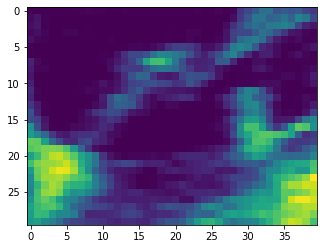

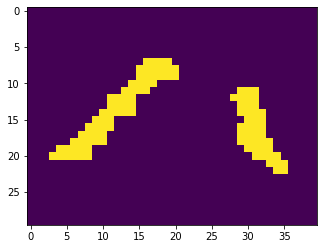

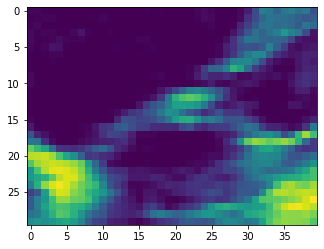

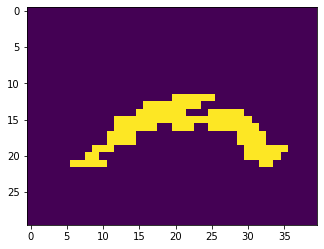

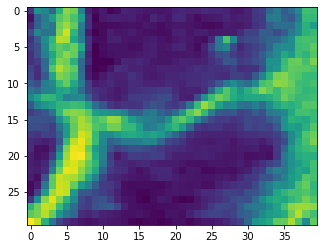

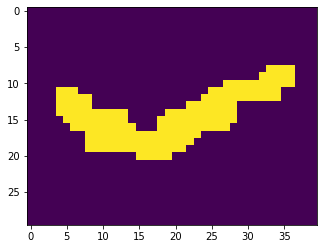

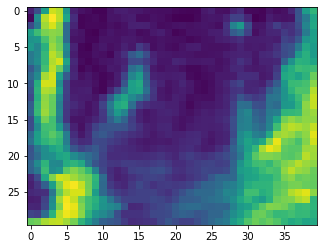

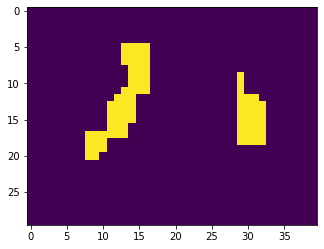

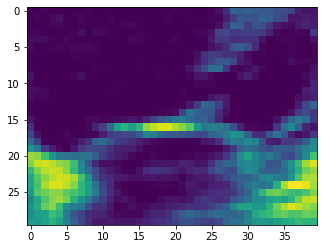

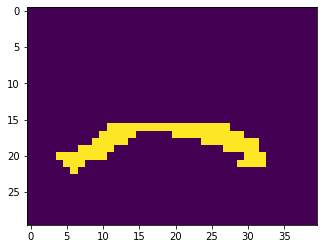

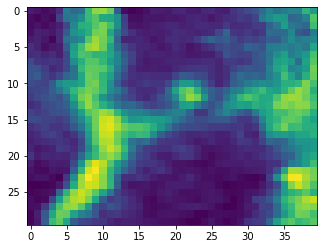

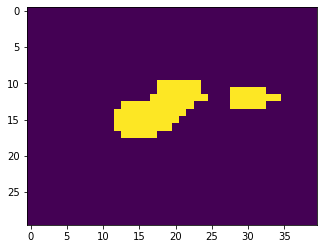

In [5]:
importlib.reload(sys.modules['task3.utils.img_utils'])
from task3.utils.img_utils import show_img_batch

show_img_batch(batch)